In [91]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, zero_one_loss

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [13]:
def add_noise(data):
    std = [0.03, 0.09, 0.18]
    noise1 = np.random.normal(0, std[0], len(data))
    noise2 = np.random.normal(0, std[1], len(data))
    noise3 = np.random.normal(0, std[2], len(data))
    
    data1 = np.add(data, noise1)
    data2 = np.add(data, noise2)
    data3 = np.add(data, noise3)
    
    return [data1, data2, data3]

In [17]:

x = np.empty(1505)
y = np.empty(1505)

x[0]=1.5
y[0]=0

for i in range(1500):
    if i<25:
        x[i+1] = x[i] - 0.1*x[i]

    else:
        x[i+1] = x[i] + ((0.2*x[i-25])/(1+pow(x[i-25],10))) - 0.1*x[i]
    y[i+1]=i

x_with_noise = add_noise(x)

inp03=[]
out03=[]

inp09=[]
out09=[]

inp18=[]
out18=[]

for i in range(300,1500):
    inp03.append([x_with_noise[0][i-20], x_with_noise[0][i-15], x_with_noise[0][i-10], x_with_noise[0][i-5], x_with_noise[0][i]])
    out03.append(x_with_noise[0][i+5])
    inp09.append([x_with_noise[1][i-20], x_with_noise[1][i-15], x_with_noise[1][i-10], x_with_noise[1][i-5], x_with_noise[1][i]])
    out09.append(x_with_noise[1][i+5])
    inp18.append([x_with_noise[2][i-20], x_with_noise[2][i-15], x_with_noise[2][i-10], x_with_noise[2][i-5], x_with_noise[2][i]])
    out18.append(x_with_noise[2][i+5])

train_X03 = np.array(inp03[0:1000])
train_y03 = np.array(out03[0:1000])
train_X09 = np.array(inp09[0:1000])
train_y09 = np.array(out09[0:1000])
train_X18 = np.array(inp18[0:1000])
train_y18 = np.array(out18[0:1000])

val_X03 = np.array(inp03[800:1000])
val_y03 = np.array(out03[800:1000])
val_X09 = np.array(inp09[800:1000])
val_y09 = np.array(out09[800:1000])
val_X18 = np.array(inp18[800:1000])
val_y18 = np.array(out18[800:1000])

test_X03 = np.array(inp03[1000:])
test_y03 = np.array(out03[1000:])
test_X09 = np.array(inp09[1000:])
test_y09 = np.array(out09[1000:])
test_X18 = np.array(inp18[1000:])
test_y18 = np.array(out18[1000:])
    


In [27]:
print("train_X03:", np.shape(test_y18))

train_X03: (200,)


In [4]:
train_X, train_y, val_X, val_y, test_X, test_y, x, y = generate_data()
train_X = train_X.astype('float')
train_y = train_y.astype('float')
train_X.reshape(-1, 1)
train_y.reshape(-1, 1)
test_X = train_X.astype('float')
test_y = train_y.astype('float')
test_X.reshape(-1, 1)
test_y.reshape(-1, 1)

array([[0.94921825],
       [0.99567019],
       [1.03083227],
       [1.05574157],
       [1.07331517],
       [1.08680026],
       [1.09898505],
       [1.11192034],
       [1.12687925],
       [1.144416  ],
       [1.16446573],
       [1.18645673],
       [1.20942842],
       [1.23217564],
       [1.25344232],
       [1.27214516],
       [1.28757326],
       [1.29952211],
       [1.30835602],
       [1.31500744],
       [1.32089315],
       [1.32765247],
       [1.33651569],
       [1.34707337],
       [1.35559491],
       [1.35483427],
       [1.33846259],
       [1.30634322],
       [1.26325991],
       [1.21455658],
       [1.16397122],
       [1.11346514],
       [1.06368798],
       [1.01450308],
       [0.9654417 ],
       [0.9160573 ],
       [0.86615702],
       [0.81589457],
       [0.76573603],
       [0.71634098],
       [0.66841736],
       [0.62260087],
       [0.57938305],
       [0.53908302],
       [0.50184375],
       [0.46763509],
       [0.43625874],
       [0.407

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


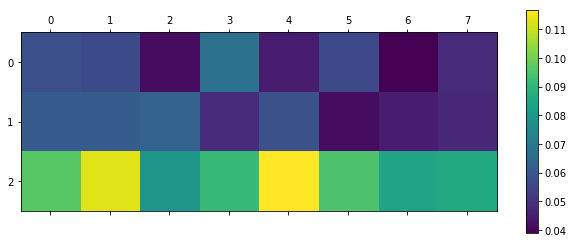

In [79]:
trainsX_noise = [train_X03, train_X09, train_X18]
valsX_noise = [val_X03, val_X09, val_X18]
testX_noise = [test_X03, test_X09, test_X18]

trainsy_noise = [train_y03, train_y09, train_y18]
valsy_noise = [val_y03, val_y09, val_y18]
testy_noise = [test_y03, test_y09, test_y18]

hidden = range(1, 9)

# Grid search for gaussian noise and number of nodes in hidden layer 2
grid = np.zeros([len(tests_noise), len(hidden)])
mses = []
#predictions = []


for i in range(len(tests_noise)):
    for j in hidden:
        res = []
        for n in range(10):
            clf = MLPRegressor(solver='sgd', 
                                batch_size='auto', 
                                alpha=0,
                                hidden_layer_sizes=[8, j],
                                early_stopping=True
                               )
            clf.fit(trainsX_noise[i], trainsy_noise[i])
            pred = clf.predict(valsX_noise[i])
            mse = mean_squared_error(pred, valsy_noise[i])
            res.append(mse)
        grid[i, j-1] = np.sum(res) / 10

#print("Grid:", grid)
plt.matshow(grid)
plt.colorbar()
plt.show()



In [73]:
def plot_errors(mse_2, mse_3):
    noise = [0.03, 0.09, 0.18]
    
    f,axarr = plt.subplots(1,sharex=True)
    axarr.plot(noise,mse_2, '-',label="Two Layer")
    axarr.plot(noise,mse_3, '-',label="Three Layer")
    axarr.set_title('Mean squared errors')
    plt.xticks(noise)
    #axarr[1].plot(range(self.epochs),self.train_ms_errors, '-',label="train")
    #axarr[1].plot(range(self.epochs),self.test_ms_errors, '-',label="test")
    #axarr[1].set_title('Mean squared error')
    
    plt.grid()
    plt.legend()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


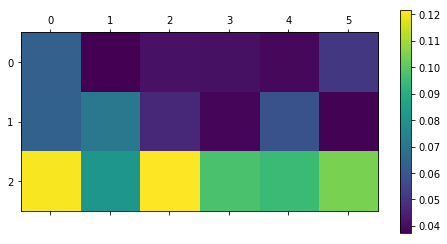

In [82]:
trainsX_noise = [train_X03, train_X09, train_X18]
valsX_noise = [val_X03, val_X09, val_X18]
testX_noise = [test_X03, test_X09, test_X18]

trainsy_noise = [train_y03, train_y09, train_y18]
valsy_noise = [val_y03, val_y09, val_y18]
testy_noise = [test_y03, test_y09, test_y18]


# Grid search for gaussian noise and number of nodes in hidden layer 2
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
grid = np.zeros([len(tests_noise), len(alphas)])
mses = []
#predictions = []
for i in range(len(tests_noise)):
    for j in range(len(alphas)):
        result = 0.0
        for n in range(10):
            clf = MLPRegressor(solver='sgd', 
                                batch_size='auto', 
                                alpha=alphas[j],
                                hidden_layer_sizes=[8, 4],
                                early_stopping=True
                               )
            clf.fit(trainsX_noise[i], trainsy_noise[i])
            pred = clf.predict(valsX_noise[i])
            mse = mean_squared_error(pred, valsy_noise[i])
            result += mse
        grid[i, j] = result / 10

#print("Grid:", grid)
plt.matshow(grid)
plt.colorbar()
plt.show()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


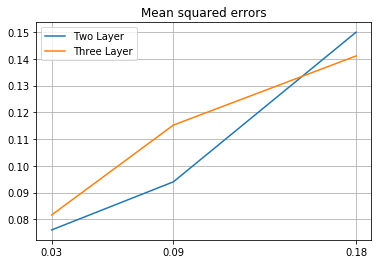

In [90]:
# 5, 4, 7
grid = np.zeros([len(tests_noise), len(alphas)])
mse_two_layer = []
mse_three_layer = []
hidden_layers = [4, 6, 7]
alphas = [0.1, 0.001, 0.0001]

results_2 = []
results_3 = []

for i in range(len(tests_noise)):
    mses_2 = []
    mses_3 = []
    for j in range(10):
        two_layer = MLPRegressor(solver='sgd', 
                            batch_size='auto', 
                            alpha=0,
                            hidden_layer_sizes=8,
                            early_stopping=True
                           )
        three_layer = MLPRegressor(solver='sgd', 
                                    batch_size='auto', 
                                    alpha=alphas[i],
                                    hidden_layer_sizes=[8, hidden_layers[i]],
                                    early_stopping=True
                                   )
        two_layer.fit(trainsX_noise[i], trainsy_noise[i])
        three_layer.fit(trainsX_noise[i], trainsy_noise[i])


        pred_2 = two_layer.predict(testX_noise[i])
        pred_3 = three_layer.predict(testX_noise[i])

        mses_2.append(mean_squared_error(pred_2, testy_noise[i]))
        mses_3.append(mean_squared_error(pred_3, testy_noise[i]))

    results_2.append(np.sum(mses_2)/10)
    results_3.append(np.sum(mses_3)/10)
    
plot_errors(results_2, results_3)
    





In [102]:

for i in range(1, 9):
    times = 0
    for n in range(10):
        clf = MLPRegressor(solver='sgd', 
                                    batch_size='auto', 
                                    alpha=0.01,
                                    hidden_layer_sizes=[i],
                                    early_stopping=True
                                   )
        start = time.time()
        clf.fit(train_X, train_X)
        end = time.time()
        times += end - start
    print("First hidden Layer:", i, "Second Hidden Layer:", j, "Time:", times/10, "ms")
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


First hidden Layer: 1 Second Hidden Layer: 8 Time: 0.15707783699035643 ms
First hidden Layer: 2 Second Hidden Layer: 8 Time: 0.17911105155944823 ms
First hidden Layer: 3 Second Hidden Layer: 8 Time: 0.19832932949066162 ms
First hidden Layer: 4 Second Hidden Layer: 8 Time: 0.24618082046508788 ms
First hidden Layer: 5 Second Hidden Layer: 8 Time: 0.2353598117828369 ms
First hidden Layer: 6 Second Hidden Layer: 8 Time: 0.21325991153717042 ms
First hidden Layer: 7 Second Hidden Layer: 8 Time: 0.259480357170105 ms
First hidden Layer: 8 Second Hidden Layer: 8 Time: 0.23949062824249268 ms


In [103]:
for i in range(1, 9):
    for j in range(1, 9):
        times = 0
        for n in range(5):
            clf = MLPRegressor(solver='sgd', 
                                        batch_size='auto', 
                                        alpha=0.01,
                                        hidden_layer_sizes=[i, j],
                                        early_stopping=True
                                       )
            start = time.time()
            clf.fit(train_X, train_X)
            end = time.time()
            times += end - start
        print("First hidden Layer:", i, "Second Hidden Layer:", j, "Time:", times/5, "ms")
        


First hidden Layer: 1 Second Hidden Layer: 1 Time: 0.05147881507873535 ms
First hidden Layer: 1 Second Hidden Layer: 2 Time: 0.08132870197296142 ms


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


First hidden Layer: 1 Second Hidden Layer: 3 Time: 0.08532309532165527 ms
First hidden Layer: 1 Second Hidden Layer: 4 Time: 0.13630051612854005 ms
First hidden Layer: 1 Second Hidden Layer: 5 Time: 0.08333365917205811 ms
First hidden Layer: 1 Second Hidden Layer: 6 Time: 0.053732872009277344 ms
First hidden Layer: 1 Second Hidden Layer: 7 Time: 0.13447284698486328 ms
First hidden Layer: 1 Second Hidden Layer: 8 Time: 0.13680343627929686 ms
First hidden Layer: 2 Second Hidden Layer: 1 Time: 0.06202731132507324 ms
First hidden Layer: 2 Second Hidden Layer: 2 Time: 0.04813575744628906 ms
First hidden Layer: 2 Second Hidden Layer: 3 Time: 0.13754725456237793 ms
First hidden Layer: 2 Second Hidden Layer: 4 Time: 0.1089963436126709 ms
First hidden Layer: 2 Second Hidden Layer: 5 Time: 0.1255415201187134 ms
First hidden Layer: 2 Second Hidden Layer: 6 Time: 0.16308832168579102 ms
First hidden Layer: 2 Second Hidden Layer: 7 Time: 0.1495579242706299 ms
First hidden Layer: 2 Second Hidden Laye